# STARBUCKS DATASET VISUALISATION & CUSTOMER SEGMENTATION

## TEAM : DaFi
### MEMBERS :
- GANDRA SAI KRISHNA (PES1UG20CS149)
- KARAN BHAT SUMBLY (PES1UG20CS193)
- SANIKA M RANGAYYAN (PES1UG20CS901)


In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn import metrics

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier

### dataset import

In [2]:
df_offer = pd.read_csv('portfolio.csv')
df_offer.head()

Unnamed: 0  reward                              channels  difficulty  \
0           0      10         ['email', 'mobile', 'social']          10   
1           1      10  ['web', 'email', 'mobile', 'social']          10   
2           2       0            ['web', 'email', 'mobile']           0   
3           3       5            ['web', 'email', 'mobile']           5   
4           4       5                      ['web', 'email']          20   

   duration     offer_type                                id  
0         7           bogo  ae264e3637204a6fb9bb56bc8210ddfd  
1         5           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0  
2         4  informational  3f207df678b143eea3cee63160fa8bed  
3         7           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9  
4        10       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7

In [3]:
df_customer = pd.read_csv('profile.csv')
df_customer.head()

Unnamed: 0 gender  age                                id  became_member_on  \
0           0    NaN  118  68be06ca386d4c31939f3a4f0e3dd783          20170212   
1           1      F   55  0610b486422d4921ae7d2bf64640c50b          20170715   
2           2    NaN  118  38fe809add3b4fcf9315a9694bb96ff5          20180712   
3           3      F   75  78afa995795e4d85b5d9ceeca43f5fef          20170509   
4           4    NaN  118  a03223e636434f42ac4c3df47e8bac43          20170804   

     income  
0       NaN  
1  112000.0  
2       NaN  
3  100000.0  
4       NaN

In [4]:
df_transcript = pd.read_csv('transcript.csv')
df_transcript.head()

Unnamed: 0                            person           event  \
0           0  78afa995795e4d85b5d9ceeca43f5fef  offer received   
1           1  a03223e636434f42ac4c3df47e8bac43  offer received   
2           2  e2127556f4f64592b11af22de27a7932  offer received   
3           3  8ec6ce2a7e7949b1bf142def7d0e0586  offer received   
4           4  68617ca6246f4fbc85e91a2a49552598  offer received   

                                              value  time  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}     0  
1  {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}     0  
2  {'offer id': '2906b810c7d4411798c6938adc9daaa5'}     0  
3  {'offer id': 'fafdcd668e3743c1bb461111dcafc2a4'}     0  
4  {'offer id': '4d5c57ea9a6940dd891ad53e9dbe8da0'}     0

### DATA WRANGLING

In [5]:
#dropping the Unnamed 0 column in all the files
df_offer = df_offer.drop('Unnamed: 0', axis = 1)
df_customer = df_customer.drop('Unnamed: 0', axis = 1)
df_transcript = df_transcript.drop('Unnamed: 0', axis = 1)

In [6]:
#checking for missing values in offers data
df_offer.isna().sum()

reward        0
channels      0
difficulty    0
duration      0
offer_type    0
id            0
dtype: int64

In [7]:
#checking for missing values in customer data
df_customer.isna().sum()

gender              2175
age                    0
id                     0
became_member_on       0
income              2175
dtype: int64

In [8]:
#checking for missing values in transcript data
df_transcript.isna().sum()

person    0
event     0
value     0
time      0
dtype: int64

- as we can see there are no missing values in the transcript and the offers data 
- in the customer data there are 2175 missing values for gender and income values

checking if the missing values are from the same person

In [9]:
missing_gender = df_customer[df_customer['gender'].isna()]
missing_income = df_customer[df_customer['income'].isna()]

np.sum(missing_gender['id'] == missing_income['id'])

2175

- as we can see the values of gender and the income values are missing from the same person and not for different ppl


Logically,income is likely to play an important role in customer behaviour, hence observations with missing income will be removed from the dataset. 
- This means 12.8% of the observations will be removed which is not ideal, however the alternative (replacing NaNs with the average or the median) will make our analysis less robust.

In [10]:
id_to_remove = missing_income['id']
df_customer_no_na = df_customer[~df_customer['id'].isin(id_to_remove)]
df_customer_no_na = df_customer_no_na.reset_index(drop = True)
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


- we have dropped the customers with no income data as it is one of the most important attribute in our analysis and many factors are dependant on the income factor therefore drop them 

<AxesSubplot:xlabel='age'>

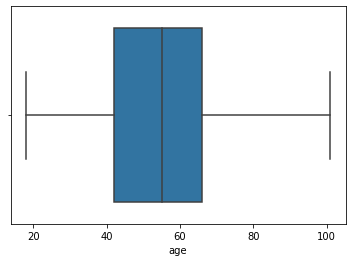

In [11]:
#Box plot of Age of Starbucks customers
sns.boxplot(data=df_customer_no_na, x='age')

In [12]:
k=df_customer_no_na[(df_customer_no_na['age'] > 100)]
# print(k.head(5))
k['age'].value_counts()

101    5
Name: age, dtype: int64

In [13]:
df_customer_no_na.drop(df_customer_no_na.index[ (df_customer_no_na['age'] >101)], inplace = True)

- as we can see there are no outliers of age 101 and 5 of them are available so we conclude to drop them

CHECKING DATA TYPES

In [14]:
#datatypes of the offer section
df_offer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   reward      10 non-null     int64 
 1   channels    10 non-null     object
 2   difficulty  10 non-null     int64 
 3   duration    10 non-null     int64 
 4   offer_type  10 non-null     object
 5   id          10 non-null     object
dtypes: int64(3), object(3)
memory usage: 608.0+ bytes


In [15]:
channels_0 = df_offer['channels'][0]
offer_type_0 = df_offer['offer_type'][0]
id_0 = df_offer['id'][0]

print('First value in column channels:', channels_0, '  --   Data type:', type(channels_0))
print('First value in column offer_type:', offer_type_0, '  --   Data type:', type(offer_type_0))
print('First value in column id:', id_0, '  --   Data type:', type(id_0))

First value in column channels: ['email', 'mobile', 'social']   --   Data type: <class 'str'>
First value in column offer_type: bogo   --   Data type: <class 'str'>
First value in column id: ae264e3637204a6fb9bb56bc8210ddfd   --   Data type: <class 'str'>


In [16]:
#datatypes of the customer info
df_customer_no_na.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14825 entries, 0 to 14824
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            14825 non-null  object 
 1   age               14825 non-null  int64  
 2   id                14825 non-null  object 
 3   became_member_on  14825 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 579.2+ KB


In [17]:
df_customer_no_na['became_member_on'] = pd.to_datetime(df_customer_no_na['became_member_on'], format = '%Y%m%d')

In [18]:
#datatypes of the transcript info
df_transcript.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 4 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   person  306534 non-null  object
 1   event   306534 non-null  object
 2   value   306534 non-null  object
 3   time    306534 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 9.4+ MB


In [19]:
#renaming the time to hrs since start
df_transcript.rename(columns = {'time' : 'hours_since_start'}, inplace = True)
df_transcript.head(1)

person           event  \
0  78afa995795e4d85b5d9ceeca43f5fef  offer received   

                                              value  hours_since_start  
0  {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}                  0

In [20]:
#checking the type of elements present in the value column
type(df_transcript['value'][0])

str

DATA TRANSFORMATION

In [21]:
# Sort df offers
df_offer = df_offer.sort_values(['offer_type', 'difficulty']).reset_index(drop = True)

# Add column `offer_alias`
from string import ascii_uppercase
df_offer['offer_alias'] = [ascii_uppercase[i] for i in range(df_offer.shape[0])]
df_offer

reward                              channels  difficulty  duration  \
0       5            ['web', 'email', 'mobile']           5         7   
1       5  ['web', 'email', 'mobile', 'social']           5         5   
2      10         ['email', 'mobile', 'social']          10         7   
3      10  ['web', 'email', 'mobile', 'social']          10         5   
4       3  ['web', 'email', 'mobile', 'social']           7         7   
5       2  ['web', 'email', 'mobile', 'social']          10        10   
6       2            ['web', 'email', 'mobile']          10         7   
7       5                      ['web', 'email']          20        10   
8       0            ['web', 'email', 'mobile']           0         4   
9       0         ['email', 'mobile', 'social']           0         3   

      offer_type                                id offer_alias  
0           bogo  9b98b8c7a33c4b65b9aebfe6a799e6d9           A  
1           bogo  f19421c1d4aa40978ebb69ca19b0e20d           B  
2           bogo  ae264e3637204a6fb9bb56bc8210ddfd           C  
3           bogo  4d5c57ea9a6940dd891ad53e9dbe8da0           D  
4       discount  2298d6c36e964ae4a3e7e9706d1fb8c2           E  
5       discount  fafdcd668e3743c1bb461111dcafc2a4           F  
6       discount  2906b810c7d4411798c6938adc9daaa5           G  
7       discount  0b1e1539f2cc45b7b9fa7c272da2e1d7           H  
8  informational  3f207df678b143eea3cee63160fa8bed           I  
9  informational  5a8bc65990b245e5a138643cd4eb9837           J

- the offers data has been reordered acoording to the type of offer and difficulty 
- Add an alias to each offer for easier recognition and referencing.

- Elements of column value are dictionaries as strings. here separation of the keys 
- the values and place them into two columns for easier manipulation is done.

In [22]:
# Elements in value_columns are strings. Convert them to dictionaries
value_column = df_transcript['value']
value_column = value_column.apply(eval)
value_column[:3]

0    {'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'}
1    {'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'}
2    {'offer id': '2906b810c7d4411798c6938adc9daaa5'}
Name: value, dtype: object

In [23]:
# Extract the keys
dictionary_key_column = [list(d.keys())[0] for d in value_column]
# Extract the values
dictionary_value_column = [list(d.values())[0] for d in value_column]
# Create a df containing the keys and values of the dictionary elements of `value_column`
value_column_split = pd.DataFrame(columns = ['dict_key', 'dict_value'])
value_column_split['dict_key'] = dictionary_key_column
value_column_split['dict_value'] = dictionary_value_column
value_column_split.head(3)

dict_key                        dict_value
0  offer id  9b98b8c7a33c4b65b9aebfe6a799e6d9
1  offer id  0b1e1539f2cc45b7b9fa7c272da2e1d7
2  offer id  2906b810c7d4411798c6938adc9daaa5

In [24]:
# Replace `value` column with df `value_column_split`
df_transcript_value_mod = df_transcript.drop('value', axis = 1)
df_transcript_value_mod = pd.concat([df_transcript_value_mod, value_column_split], axis = 1)

In [25]:
# Reorder columns
df_transcript_value_mod.columns.values

array(['person', 'event', 'hours_since_start', 'dict_key', 'dict_value'],
      dtype=object)

In [26]:
col_names = ['person', 'event', 'dict_key', 'dict_value', 'hours_since_start']
df_transcript_value_mod = df_transcript_value_mod[col_names]
df_transcript_value_mod.sample(3)

person         event  dict_key  \
107462  cc71b85ec36d43dfabafede2e142fc9e   transaction    amount   
92939   cccc28cea9bf4b1f94bd032402c66438   transaction    amount   
18184   8c843138f8d642da9bec4370e87c38d9  offer viewed  offer id   

                              dict_value  hours_since_start  
107462                             21.34                312  
92939                               5.12                240  
18184   9b98b8c7a33c4b65b9aebfe6a799e6d9                 12

Save checkpoints after data cleaning

In [27]:
offers = df_offer.copy()
customers = df_customer_no_na.copy()
transcripts = df_transcript_value_mod.copy()

### EXPLORARTORY DATA ANALYSIS

#### customer data


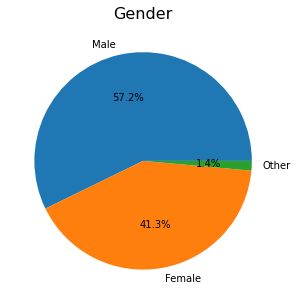

In [28]:
#Univariate Analysis - gender

wedge_size =  df_customer_no_na['gender'].value_counts()
wedge_label = ['Male', 'Female', 'Other']
plt.figure(figsize = (5,5))
plt.pie(x = wedge_size, labels = wedge_label, autopct = '%1.1f%%')
plt.title('Gender', fontsize = 16)
plt.show()

- 57.2% of the customers are male
- 41.3% of the customers are female
- 1.4% are belonging to the other categories

count    14825.000000
mean        54.393524
std         17.383705
min         18.000000
25%         42.000000
50%         55.000000
75%         66.000000
max        101.000000
Name: age, dtype: float64


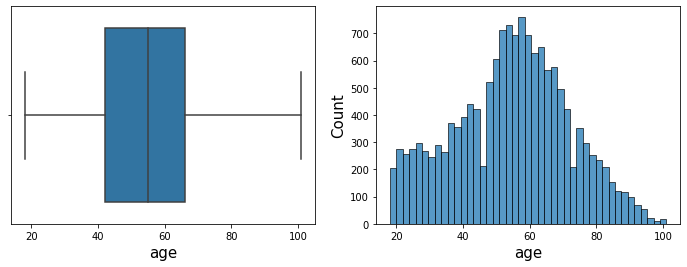

In [29]:
#Univariate Analysis - age
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'age', ax = axs[0])
sns.histplot(data = customers, x = 'age', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['age'].describe())

Observations

The youngest customer is 18 years old and the oldest is 101 years old.
The age of the customers roughly follows a normal distribution with the mean and the standard deviation equal to 54 and 17.

In [30]:
#Divide customers into age groups
# Create a new column `age_group`
age_group = pd.cut(customers['age'],
      bins = [customers['age'].min(), 26, 36, 46, 56, 66, 76, 86, customers['age'].max()],
      labels = ['18-25ys', '26-35ys', '36-45ys', '46-55ys', '56-65ys', '66-75ys', '76-85ys', '> 86ys'])
customers['age_group'] = age_group

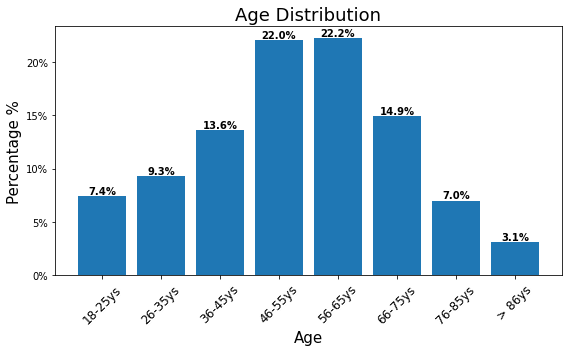

In [31]:
# Visualize customers by age groups
age_group_percentage = (customers.value_counts('age_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,25,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels)
plt.xticks(rotation = 45, fontsize = 12)
plt.xlabel('Age', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Age Distribution', fontsize = 18)

bar_plot = plt.bar(x = age_group_percentage.index.values, height = age_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(age_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold')

plt.tight_layout()
plt.show()

Observations

- The largest age group of customers is 56-65 years olds, closely followed by age group 46-55 years olds. The third largest age group is 66-75 years olds.
- Top 3 age groups account for approximately 60% of customers.
    - This makes sense as people between 46 - 75 years old tend to be less busy than younger people, therefore have more time to visit cafes. 
    - They also tend to have better mobility than more senior people (above 75 years old), therefore are more likely to be our customers.

count     14825.000000
mean      65404.991568
std       21598.299410
min       30000.000000
25%       49000.000000
50%       64000.000000
75%       80000.000000
max      120000.000000
Name: income, dtype: float64


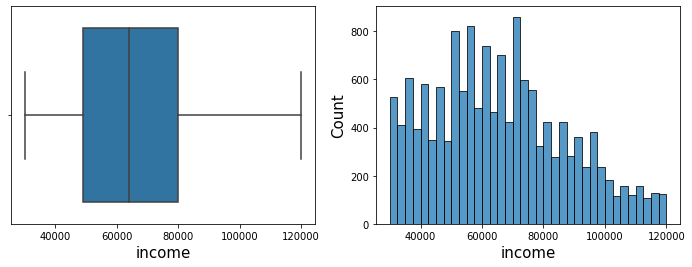

In [32]:
#Univariate Analysis - income
fig, axs = plt.subplots(1,2, figsize = (12,4))
sns.boxplot(data = customers, x = 'income', ax = axs[0])
sns.histplot(data = customers, x = 'income', ax = axs[1])
axs[0].xaxis.label.set_size(15)
axs[1].xaxis.label.set_size(15)
axs[1].yaxis.label.set_size(15)

print(customers['income'].describe())

Divide customers into income groups

In [33]:
# Create a new column `income_group`
income_group = pd.cut(customers['income'],
      bins = [customers['income'].min(), 45000, 60000, 75000, 90000, 105000, customers['income'].max()],
      labels = ['30-45k', '45-60k', '60-75k', '75-90k', '90-105k', '> 105k'])
customers['income_group'] = income_group

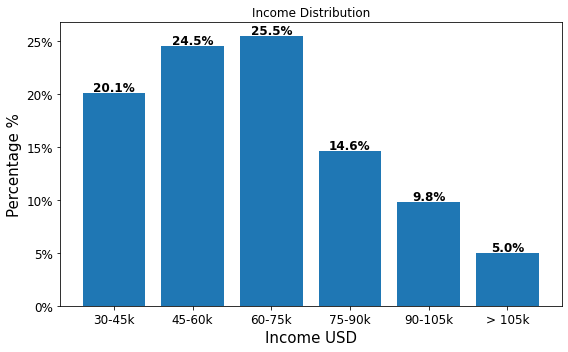

In [34]:
# Visualize customers by income groups
income_group_percentage = (customers.value_counts('income_group').sort_index() / customers.shape[0] * 100).round(1)
plt.figure(figsize = (8, 5))
yticks = np.arange(0,30,5)
yticklabels = [str(y) + '%' for y in yticks]
plt.yticks(yticks, labels = yticklabels, fontsize = 12)
plt.xticks(fontsize = 12)
plt.xlabel('Income USD', fontsize = 15)
plt.ylabel('Percentage %', fontsize = 15)
plt.title('Income Distribution')

bar_plot = plt.bar(x = income_group_percentage.index.values, height = income_group_percentage)
for i,bar in enumerate(bar_plot.patches):
    x, y = bar.get_xy()
    plt.text(x+bar.get_width()/2, y+bar.get_height()+0.2,
            str(income_group_percentage[i]) + '%',
            ha = 'center', weight = 'bold', fontsize = 12)

plt.tight_layout()
plt.show()


Observations:

- Income of customers has a range of 30k to 120k, with an average of 65.4k.
- Top 2 income groups consist of customers with annaul income of 60-75k and 45-60k. These account for approximately 50% of customers.
- The income distribution among the customers may, to a large extent, in line with that over the whole population, except that people with extremely low income might find it hard to afford regular cafe visits, while people with extremely high income may prefer other ways to enjoy their coffee.

In [35]:
#Univariate Analysis - became_member_on
# Create a new df focusing on the time customers became members
df_member = customers[['id', 'became_member_on']]

# Add columns `year`, `month`, `day_of_week`
df_member = df_member.assign(year = df_member.became_member_on.dt.year,
                             month = df_member.became_member_on.dt.month,
                             day = df_member.became_member_on.dt.day,
                             month_name = df_member.became_member_on.dt.month_name(),
                             day_of_week = df_member.became_member_on.dt.weekday,
                             day_name = df_member.became_member_on.dt.day_name())
df_member.head(5)

id became_member_on  year  month  day  \
0  0610b486422d4921ae7d2bf64640c50b       2017-07-15  2017      7   15   
1  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09  2017      5    9   
2  e2127556f4f64592b11af22de27a7932       2018-04-26  2018      4   26   
3  389bc3fa690240e798340f5a15918d5c       2018-02-09  2018      2    9   
4  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11  2017     11   11   

  month_name  day_of_week  day_name  
0       July            5  Saturday  
1        May            1   Tuesday  
2      April            3  Thursday  
3   February            4    Friday  
4   November            5  Saturday

Member growth by year

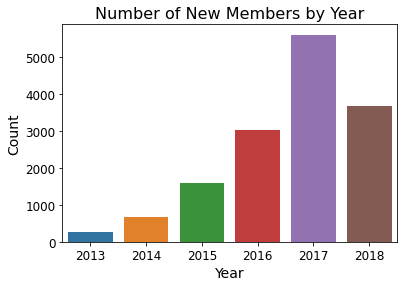

In [36]:
sns.countplot(data = df_member, x = 'year')
plt.title('Number of New Members by Year', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Year', fontsize = 14); plt.ylabel('Count', fontsize = 14)
plt.show()

Daily member growth

In [37]:
# Create a time series with the number of new member on each day
p = df_member.value_counts('became_member_on').sort_index()
df_member_growth = pd.DataFrame(index = p.index.values, data = p.values, columns = ['Number of New Members'])

In [38]:
# There are four phases with clearly different daily growth
phase_1 = df_member_growth.loc['2013-july': '2015-july']
len_phase_1 = phase_1.shape[0]
mean_phase_1 = phase_1.mean().values

phase_2 = df_member_growth.loc['2015-august': '2017-july']
len_phase_2 = phase_2.shape[0]
mean_phase_2 = phase_2.mean().values

phase_3 = df_member_growth.loc['2017-august': '2018-jan']
len_phase_3 = phase_3.shape[0]
mean_phase_3 = phase_3.mean().values

phase_4 = df_member_growth.loc['2018-feb': '2018-july']
len_phase_4 = phase_4.shape[0]
mean_phase_4 = phase_4.mean().values

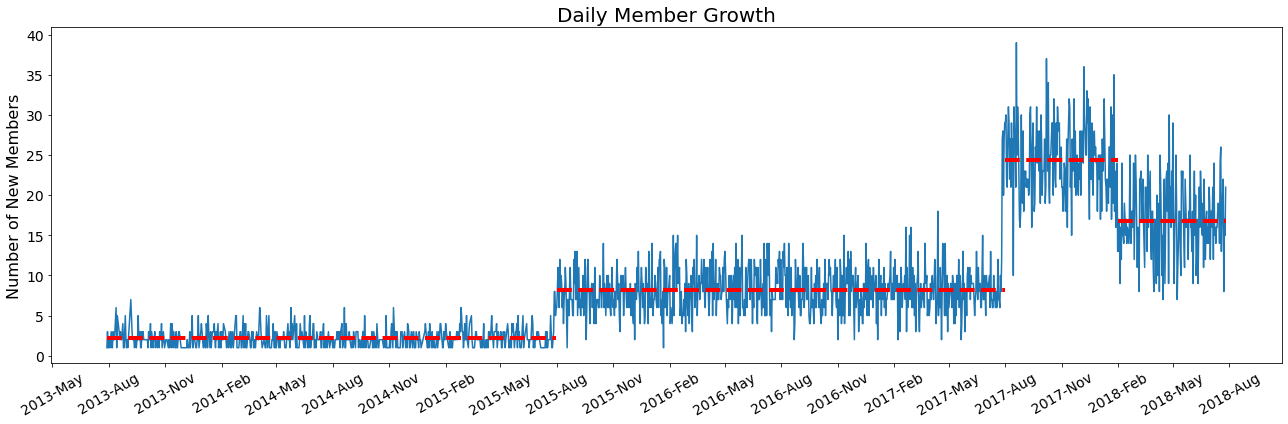

In [39]:
# Visualize
plt.figure(figsize = (18,6))
ax = sns.lineplot(x = df_member_growth.index.values, y = df_member_growth['Number of New Members'])
date_format = mdates.DateFormatter('%Y-%b')
ax.xaxis.set_major_formatter(date_format)
ax.xaxis.set_major_locator(mdates.MonthLocator(interval = 3))

plt.plot(phase_1.index.values, np.ones(len_phase_1)*mean_phase_1, '--r', lw = 4)
plt.plot(phase_2.index.values, np.ones(len_phase_2)*mean_phase_2, '--r', lw = 4)
plt.plot(phase_3.index.values, np.ones(len_phase_3)*mean_phase_3, '--r', lw = 4)
plt.plot(phase_4.index.values, np.ones(len_phase_4)*mean_phase_4, '--r', lw = 4)

plt.xticks(text = ax.xaxis.get_label(), fontsize = 14, rotation = 30)
plt.yticks(text = ax.yaxis.get_label(), fontsize = 14)
plt.ylabel('Number of New Members', fontsize = 16)
plt.title('Daily Member Growth', fontsize = 20)
plt.tight_layout()
plt.show()

Observations:

- The data contains customers became members from July 2013 to July 2018.
- Very few customers (~2.2) chose to become a member from 2013 to mid-2015.
- The number of new members started to pick up from mid-2015 and really took off from mid-2017. The company must have had some sucessful compaigns around mid of 2015 and mid of 2017 that drastically boosted member growth.
- However, from early 2018 the daily number growth dropped by 31% . Maybe some new strategies were applied then and had a negative impact on the member growth.

Member growth by Month

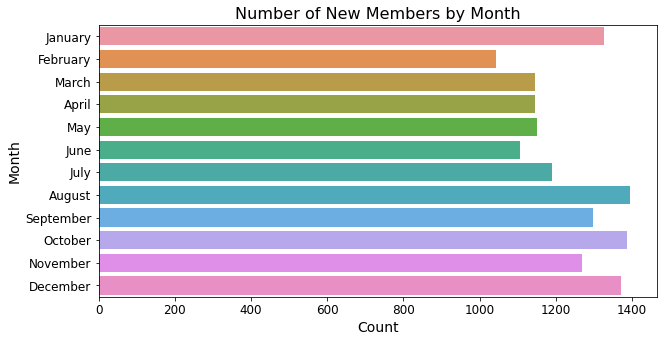

In [40]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('month'), y = 'month_name')
plt.title('Number of New Members by Month', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Month', fontsize = 14)
plt.show()

Member growth by weekday

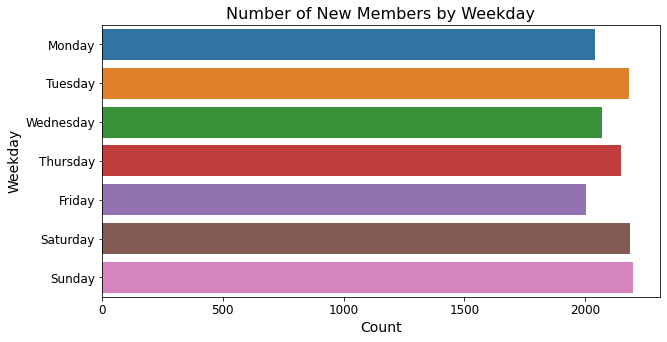

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(data = df_member.sort_values('day_of_week'), y = 'day_name')
plt.title('Number of New Members by Weekday', fontsize = 16)
plt.xticks(fontsize = 12); plt.yticks(fontsize = 12)
plt.xlabel('Count', fontsize = 14); plt.ylabel('Weekday', fontsize = 14)
plt.show()

Observations

- The months saw most customers becoming memebrs was August, followed by October and Decemebr.
- There were least new memebrs in Feburary on average.
- In terms of days in a week, unsuprisingly, weekend saw the higher member growth than weekdays. 
- Tuesday had the highest member growth among weekdays.
- There were least new memebrs on Friday on average.

Bivariate Analysis - age vs gender

              age
gender           
F       57.544950
M       52.116690
O       54.400943


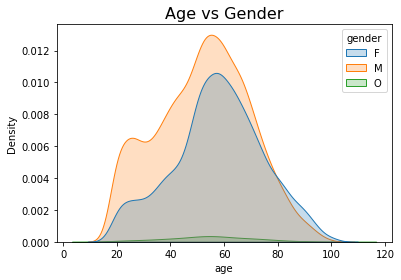

In [42]:
print(customers.groupby('gender').agg({'age': 'mean'}))
sns.kdeplot(data = customers, x = 'age', hue = 'gender', fill = True)
plt.title('Age vs Gender', fontsize = 16)
plt.show()

Observations:

- The number of female and male cutomers roughly follows a normal distribution.
- There is a larger proportion of young customers in males than females.
- Female customers, male customers and cutomers of other genders are 57.5, 52.1 and 54.4 year old on average.

Bivariate Analysis - income vs gender

              income
gender              
F       71306.412139
M       61194.601603
O       63287.735849


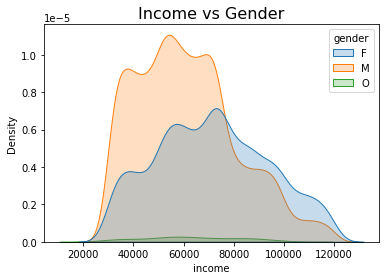

In [43]:
print(customers.groupby('gender').agg({'income': 'mean'}))
sns.kdeplot(data = customers, x = 'income', hue = 'gender', fill = True)
plt.title('Income vs Gender', fontsize = 16)
plt.show()

Observations

- Income of female customers roughly follows a normal distribution. This indicates female customers accross the whole income range enjoys the company's products.
- Income of male customers is skewed to the right. This means among the company's male customers, more people are on the lower half of the income spectrum
- Female customers have a much higher average income than other genders. This maybe becase they are on average older than other gender groups, assumming older customers have higher incomes.
- Average income of female customers, male customers and cutomers of other genders are 71k, 61k and 63k.

Bivariate Analysis - income vs age

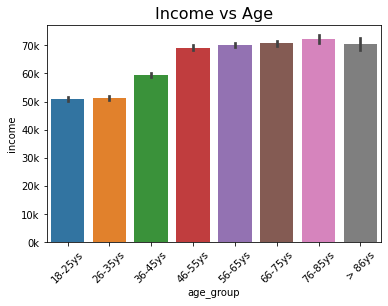

In [44]:
sns.barplot(data = customers, x = 'age_group', y = 'income')
plt.xticks(rotation = 45)
ytick_labels = [str(i) + 'k' for i in (np.arange(0, 80000, 10000) / 1000).astype(int)]
plt.yticks(np.arange(0, 80000, 10000), labels = ytick_labels)
plt.title('Income vs Age', fontsize = 16)
plt.show()

Observations

- Customers in the two younger age groups (18-35 years old) has an average annual income of about 51k USD. 
- The middle age groups (36-55 years old) has an average annual income of about 65k. 
- All age groups above 56 years old have very similar average annual income of round 70k. 
- On average, older customers of the company have higher incomes.
- The company's customers in all age groups have a much higher average income than the median income of US citizens (30,119 USD in 2018).

#### EDA on offer data


Pairplots of numerical variables reward, difficuty and duration ( offer_type also shown with color)

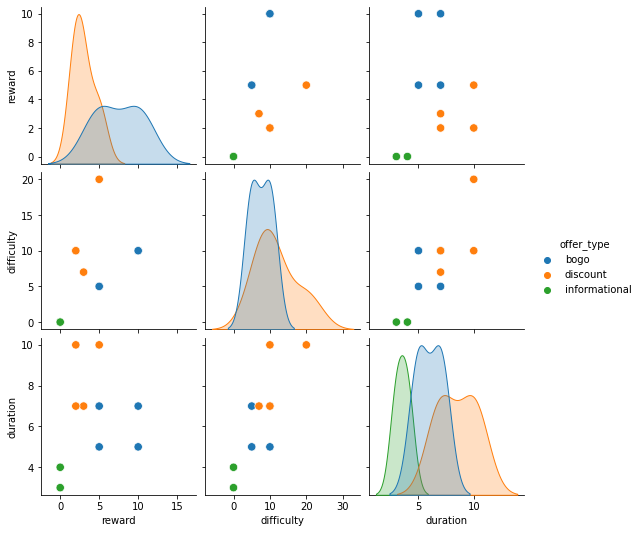

In [45]:
sns.pairplot(offers, hue = 'offer_type', 
             plot_kws = dict(marker="o", s=70),); plt.show()

Observations

- There are 4 'bogo' offers (i.e. buy one get one), 4 'discount' offers and 2 'informational' offers.
- 'Discount' offers tend to have the longest duration, followed by 'bogo' offers. 'Informational' offers have the shortest duration.
- 'Discount' offers tend to have higher difficulty but lower rewards compared with 'bogo' offers.
##
- Offer difficulty seems to be possitively correlated with offer reward.
- Offer duration seems to negatively correlate with reward and positively correlate with difficulty, when 'informational' offers are exclued 

Univariate - channels

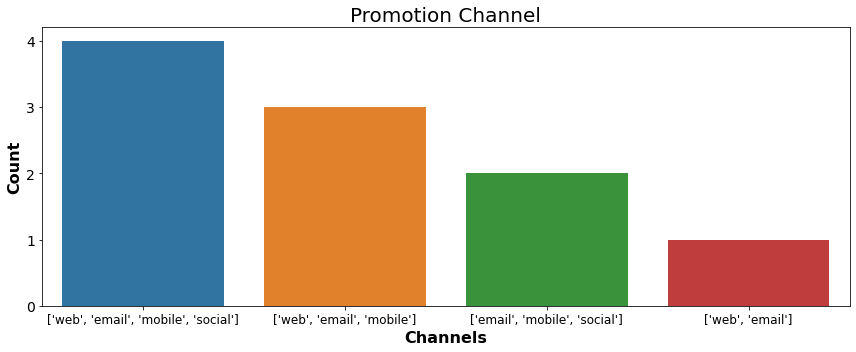

In [46]:
p = offers.value_counts('channels')
plt.figure(figsize = (12,5))
sns.barplot(x = p.index.values, y = p.values)
plt.xticks(rotation = None, fontsize = 12)
plt.yticks(np.arange(5), fontsize = 14)
plt.xlabel('Channels', fontsize = 16, fontweight = 'bold')
plt.ylabel('Count', fontsize = 16, fontweight = 'bold')
plt.title('Promotion Channel', fontsize = 20)
plt.tight_layout()
plt.show()

Observations

- Offers were sent to customers through combinations of 4 types of promotion channels websites, email, mobile App and social. There are 4 combinations of channels used by the 10 offers. 
- Promotional effect of each channel :
    - 4 offers used all channels (blue).
    - 3 offers used all channels except for social meida (orange). Promotional effect of social media could be extract from certain forms of comparison between these offers with offers using all channels.
    - 2 offers used all channels except for websites (green). Promotional effect of websites could be extract from comparison between these offers with offers using all channels.
    - 2 offers only used websites and email (red). Promotional effect of mobile App can be extracted from comparison between these offer with offers in the orange group.

Bivariate - check the correlation observed in the pairplot

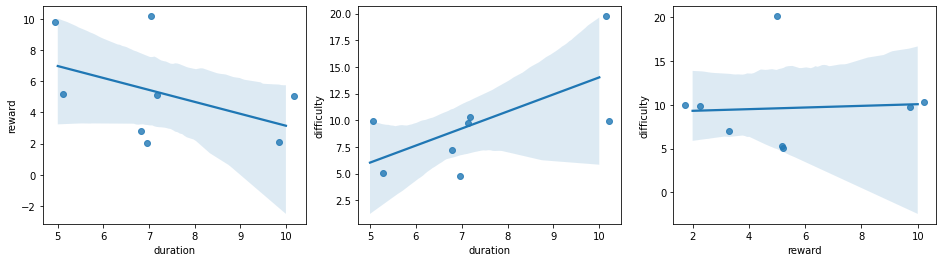

In [47]:
fig, axs = plt.subplots(1,3, figsize = (16,4))
sns.regplot(data = offers[0:8], x = 'duration', y ='reward', x_jitter = 0.3, y_jitter = 0.3, ax = axs[0])
sns.regplot(data = offers[0:8], x = 'duration', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[1])
sns.regplot(data = offers[0:8], x = 'reward', y ='difficulty', x_jitter = 0.3, y_jitter = 0.3, ax = axs[2])
plt.show()

Observations

- negative relationship between offer dutation and reward.
- positive correlation relationship between offer dutation and difficulty.
- Rewards and difficulty were not desinged to follow any clear relation.

#### EDA on transcripts data

Univariate Analysis - event

In [48]:
transcripts['event'].value_counts()

transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: event, dtype: int64

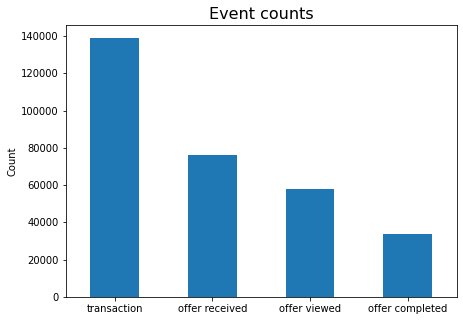

In [49]:
fig = plt.figure(figsize = (7,5))
transcripts['event'].value_counts().plot(kind = 'bar')
plt.xticks(rotation = None)
plt.ylabel('Count')
plt.title('Event counts', fontsize = 16)
plt.show()

Observations

- In the dataset, there are ~140,000 transactions (purchases). This number is slightly above 4 time of offers completed, indicating many customers made multiple purchases without an offer. This shows good customer stickiness in general. 
- However, this is also, to some extent, as expected, because products of Starbucks are mainly coffee and food, which are fast-moving customer goods (FMCG).


In [50]:
# Add column `days_since_start`
transcripts = transcripts.assign(days_since_start = transcripts['hours_since_start']/24).astype({'days_since_start': 'int64'})
print('The minimum and the maximum of column days_since_start: {} and {}'.format(transcripts['days_since_start'].min(), transcripts['days_since_start'].max()))

The minimum and the maximum of column days_since_start: 0 and 29


Note there are 30 days (714 hours) in the campain, starting from Day 0 and ending on Day 29.

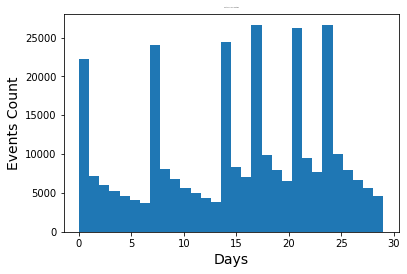

In [51]:
plt.hist(transcripts['days_since_start'], bins = 30)
plt.xlabel('Days', fontsize = 14)
plt.ylabel('Events Count', fontsize = 14)
plt.title('Events Occurrence over time', fontsize = 1)
plt.show()

- 6 peaks of events during the campaign. These peaks should correspond to offers being received, while other events (offers viewed, offers completed and purchases) occured afterwards over time.


In [52]:
transcripts[transcripts['event'] == 'offer received'].groupby('hours_since_start').count()

person  event  dict_key  dict_value  days_since_start
hours_since_start                                                       
0                   12650  12650     12650       12650             12650
168                 12669  12669     12669       12669             12669
336                 12711  12711     12711       12711             12711
408                 12778  12778     12778       12778             12778
504                 12704  12704     12704       12704             12704
576                 12765  12765     12765       12765             12765

The hypothesis is proved ture that the offers were received on 6 days (within one hours each time) during the compaign.


event over time - A break-down

In [53]:
# Find how many events occurred in each hour
viewed_hourly = transcripts[transcripts['event'] == 'offer viewed'].value_counts('hours_since_start').sort_index()
completed_hourly = transcripts[transcripts['event'] == 'offer completed'].value_counts('hours_since_start').sort_index()
transaction_hourly = transcripts[transcripts['event'] == 'transaction'].value_counts('hours_since_start').sort_index()
print(len(viewed_hourly), len(completed_hourly), len(transaction_hourly))

120 120 120


The three Series record the number of hourly occurrence of each of the three event types. They all have 120 records, i.e. 120 hours.

In [54]:
(viewed_hourly.index.values == completed_hourly.index.values).sum(), (completed_hourly.index.values == transaction_hourly.index.values).sum()

(120, 120)

In [55]:
# Find how many events of each type occurred on each day from Day 0 to Day 29
received_daily = transcripts[transcripts['event'] == 'offer received'].value_counts('days_since_start').sort_index()
viewed_daily = transcripts[transcripts['event'] == 'offer viewed'].value_counts('days_since_start').sort_index()
completed_daily = transcripts[transcripts['event'] == 'offer completed'].value_counts('days_since_start').sort_index()
transaction_daily = transcripts[transcripts['event'] == 'transaction'].value_counts('days_since_start').sort_index()

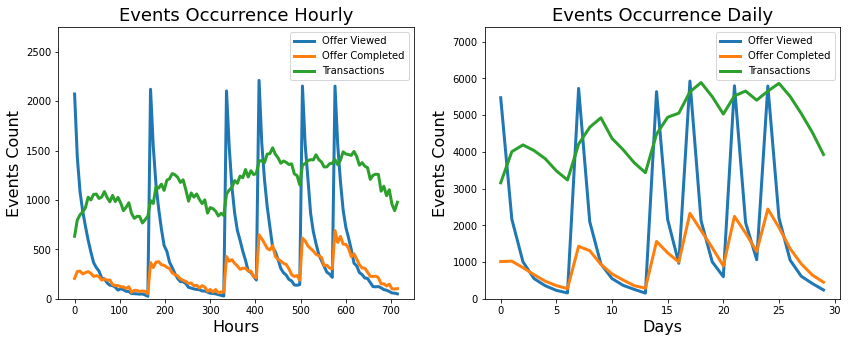

In [56]:
# Visualize
hours = viewed_hourly.index.values
fig, axs = plt.subplots(1,2, figsize = (14, 5))
# axs[0].stem(received_hourly.index.values, received_hourly, linefmt = ':k')
axs[0].plot(hours, viewed_hourly, lw = 3)
axs[0].plot(hours, completed_hourly, lw = 3)
axs[0].plot(hours, transaction_hourly, lw = 3)
axs[0].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[0].set_ylim([0, 2750])
axs[0].set_xlabel('Hours', fontsize = 16)
axs[0].set_ylabel('Events Count', fontsize = 16)
axs[0].set_title('Events Occurrence Hourly', fontsize = 18)

days = np.arange(30)
# axs[1].stem(received_daily.index.values, received_daily, linefmt = ':k')
axs[1].plot(days, viewed_daily, lw = 3)
axs[1].plot(days, completed_daily, lw = 3)
axs[1].plot(days, transaction_daily, lw = 3)
axs[1].legend(['Offer Viewed', 'Offer Completed', 'Transactions'], loc = 'upper right', ncol = 1, fontsize = 10)
axs[1].set_ylim([0, 7400])
axs[1].set_xlabel('Days', fontsize = 16)
axs[1].set_ylabel('Events Count', fontsize = 16)
axs[1].set_title('Events Occurrence Daily', fontsize = 18)

plt.show()

Observations:

- Offer completion was highly correlated with offer viewing (orange v.s. blue). 
- In the Hourly subplot, each peak of offer viewing is followed by a peak of offer completeion, with a very short lag in time. This indicates customers who clicked on the offer tended to use it within hours. 
- This is supported by the Daily subplot. When data is aggregated (from hours) to days, the location of peaks of offer viewing and offer completeion align perfectly, showing that a large fraction of customers completed the offer on the same day of viewing.
- Transactions (green) is also clearly correlated with the other two types of events, however, showing a more spreaded pattern.
Comparing offer completion and transactions (orange and green) reveals a very interesting phenomenon. 
- After each viewing peak, offer completion reaches its peak very quicly (with in hours), while the transaction keeps increasing and reaches its peak after about two days. This indicates that the offers did not only bring in more purchases by customer directly using the offers (enjoyed a discount or other benefit), but also help form customer's purchasing habbit (although short-lived by individual offers).


Insights:

- Offers do not only bring in revenue directly, but also help improve customer stickiness. The effect of each individual offer is short-lived, therefore the company should send offers to customers at a certain frequency to help form their pruchasing habbit.

### OFFER ANALYSIS

completing an offer requires two actions from the customers - to view it, then to complete it. Therefore, the overall completion rate is determined by two metrics:

View rate (number of offers viewed divided by number of offers received)
Completion rate (number of offers completed divided by number of offers viewed)

3.1 most popular offer

Merge offers and transcripts
Merge the offer data and the transcript (event only) data:

In [57]:
# Create a df that only contains events about offers
df_event = transcripts[~(transcripts['event'] == 'transaction')]

# Merge df_event with and offers
event_offer = pd.merge(df_event, offers, left_on = 'dict_value', right_on = 'id').drop('id', axis = 1)

# Reorder columns of the merged df
col_names = ['person', 'event', 'offer_alias', 'reward',
       'channels', 'difficulty', 'duration', 'offer_type', 'hours_since_start', 'days_since_start', 'dict_key', 'dict_value',]
event_offer = event_offer[col_names]

# Drop column `dict_value`, as this is offer id which is hard to identify. This information is provided by column `offer_alias`
event_offer = event_offer.drop('dict_value', axis = 1)
event_offer.sample(3)

person            event offer_alias  reward  \
133589  95ce722d4d3a48dd915b3be37884cf9f   offer received           I       0   
105226  acad430d2c2e472ab00ef44c9dd87b0f  offer completed           E       3   
21061   4f3a81d69e5a4c6eb15f4a2fe2e628b1   offer received           H       5   

                                    channels  difficulty  duration  \
133589            ['web', 'email', 'mobile']           0         4   
105226  ['web', 'email', 'mobile', 'social']           7         7   
21061                       ['web', 'email']          20        10   

           offer_type  hours_since_start  days_since_start  dict_key  
133589  informational                576                24  offer id  
105226       discount                 12                 0  offer_id  
21061        discount                336                14  offer id

3.2 Completion Rate %

In [58]:
# Find out the number of time being received for each offer 
offer_received = event_offer[event_offer['event'] == 'offer received']
p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)

# Find out the number of time being completed for each offer 
offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

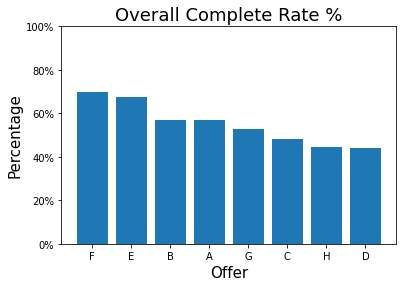

In [59]:
# Overall completion rate of each offer
overall_complete_rate = (p2.sort_index() / p0.sort_index()).sort_values(ascending = False)

# Visualize
plt.bar(x = overall_complete_rate.index.values, height = overall_complete_rate.values)
plt.title('Overall Complete Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

Observations

- Offers with top 3 popularity were Offer F, E and B, achieving an overall completion rate of 70%, 67.4% and 56.7%, respectively.
- The least popular offers was Offer D, with an overall competion rate of around 44%.

Note: Offers I and J are not included in the plot, becuase they are informational, therefore do not have event 'offer completed'.

checking offers recieved

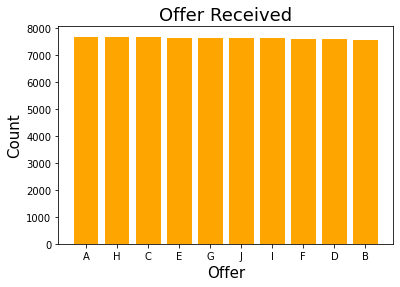

In [60]:
# offer_received = event_offer[event_offer['event'] == 'offer received']
# p0 = offer_received.value_counts('offer_alias').sort_values(ascending = False)
plt.bar(x = np.arange(len(p0)), height = p0.values, tick_label = p0.index.values, color = 'orange')
plt.title('Offer Received', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Count', fontsize = 15)
plt.show()

Observation: 
- All 10 offers have been received almost the same number of times, approximately 7600, during the month of campaign.

In [61]:
# Find out how many time each offer were received on each receiving day
num_offers = offers.shape[0]
each_offer_received = pd.DataFrame(index = received_daily.index.values)
for col in ascii_uppercase[:num_offers]:
    each_offer_received[col] = offer_received[offer_received['offer_alias'] == col].value_counts('days_since_start').sort_index()
each_offer_received.index = ['Day' + str(x) for x in received_daily.index.values]


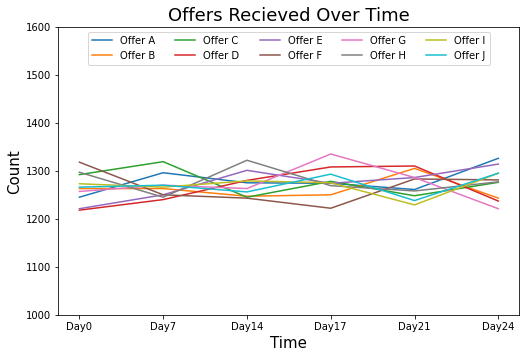

In [62]:
# Visualize
fig = plt.figure(figsize = (8, 5))
ax = fig.add_axes((0.1, 0.1, 0.8, 0.8))

for col in ascii_uppercase[:num_offers]:
    ax.plot(np.arange(6), each_offer_received[col])
    
ax.set_ylim([1000,1600])
ax.set_xticks(np.arange(6))
ax.set_xticklabels(each_offer_received.index.values)
ax.set_xlabel('Time', fontsize = 15)
ax.set_ylabel('Count', fontsize = 15)
legend_str = ['Offer ' + i for i in ascii_uppercase[:num_offers]]
plt.legend(legend_str, loc = 'upper center', ncol = 5, fontsize = 10)
plt.title('Offers Recieved Over Time', fontsize = 18)
plt.show()

Each offer was received for a similar number of time on every offer receiving day (Day 0, 7, 14, 17, 21 and 24). This prevents systemetic bias on customer behaviour due to the order of offers being received.

3.3 View Rate %

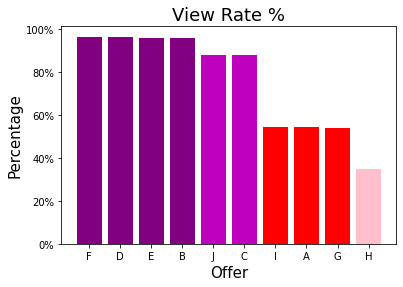

In [63]:
offer_viewed = event_offer[event_offer['event'] == 'offer viewed']
p1 = offer_viewed.value_counts('offer_alias').sort_values(ascending = False)
p1_rate = (p1.sort_index() / p0.sort_index()).sort_values(ascending = False)
plt.bar(x = np.arange(len(p1)), height = p1_rate.values, tick_label = p1_rate.index.values,
       color = ['purple', 'purple','purple', 'purple', 'm', 'm','r', 'r', 'r', 'pink'])
plt.title('View Rate %', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.2, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%'])
plt.show()

Observations

- Very interesting information is revealed here. The 10 bars, representing the 10 offers, clearly show 4 levels in height, separating the offers into 4 groups. These 4 groups accurately corresponds to 4 combinations of channel of promotion, as summaized below (also color-coded in the plot):

###### Offer	 -->   Promotion  -->  Channels
###### Group 1	-->    F D E B	-->    email, mobile, social, web
###### Group 2	 -->   J C	   -->     email, mobile, social
###### Group 3	 -->   I A G	-->    email, mobile, web
###### Group 4	 -->   H	  -->      email, web

Comparing between groups reveals information on the effectiveness of different promotion channels:

INSIGHTS :
- Group 1, 2	Web	Group 1 has a slightly higher view rate.	Offers from websites had a very limited contribution towards view rate.
- Group 2, 3	Social Media	Group 2 has a significantly higher view rate.	Offers from social media had a significant contribution towards view rate.
- Group 3, 4	Mobile	Group 3 has a higher view rate by a good amount.	Offers received from mobile App had a decent contribution towards view rate.
- Group 4 alone	Email (taking Web into account)	Reduce effect of Web to get that of Email	As web has a very small contribution towards view rate, most offers in Group 4 were viewed through email. 

Conclusion

Offers sent through the same promotion channels had very similar view rate, despite of the difference in other factors (offer type, duration, reward and difficulty). Therefore, promotion channels is the most important (if not only) factor on the offer view rate.
All channels contributed to offer view rate. However, their importance clearly differs:
Social Media > Email >= Mobile > Website

3.4 Completion Rate %

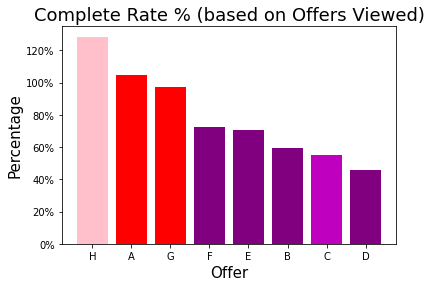

In [64]:
# offer_completed = event_offer[event_offer['event'] == 'offer completed']
p2 = offer_completed.value_counts('offer_alias').sort_values(ascending = False)

p2_rate = (p2.sort_index() / p1.sort_index()).sort_values(ascending = False)
color_list = ['pink', 'red', 'red', 'purple', 'purple', 'purple', 'm', 'purple']
plt.bar(x = p2_rate.index.values, height = p2_rate.values, color = color_list)
plt.title('Complete Rate % (based on Offers Viewed)', fontsize = 18)
plt.xlabel('Offer', fontsize = 15)
plt.ylabel('Percentage', fontsize = 15)
plt.yticks(np.arange(0,1.4, 0.2), labels = ['0%', '20%', '40%', '60%', '80%', '100%', '120%'])
plt.show()

Note: the color-code of bars is the same as that used in the plot of View Rate %, i.e. The darker-purple, the higher view rate; the lighter pink, the lower view rate.

Observations

- For offers that have been viewed, the completion rate rages from 46% to 128%.
- Offers H and A both achived a completion rate of over 100%! This means on average they were completed by customers more than once.
- For offers with 5 top completion rate, all are of type 'discount', with Offer A being the only exception. This reveals that customers preferred 'dicount' type to 'bogo'.

Conclusion
The main factor influencing offer completion rate is the offer type, 'Discount' > 'bogo'.

3.5 CORRELATION OF OTHER FACTORS 

In [65]:
# Create a new df to hold the relavent variables
offers_added = offers.assign(view_rate = p1_rate.sort_index().values,
                            complete_rate = p2_rate.sort_index().values)

# Set `offer_alias` as index
offers_added.set_index('offer_alias', inplace = True)

# From the new df, extract `view_rate`, 'complete_rate' and other numeric columns
offers_numeric = offers_added.select_dtypes(include = 'number')
offers_numeric.head()

reward  difficulty  duration  view_rate  complete_rate
offer_alias                                                        
A                 5           5         7   0.543311       1.043874
B                 5           5         5   0.959451       0.591410
C                10          10         7   0.876991       0.549136
D                10          10         5   0.961148       0.456426
E                 3           7         7   0.959587       0.702740

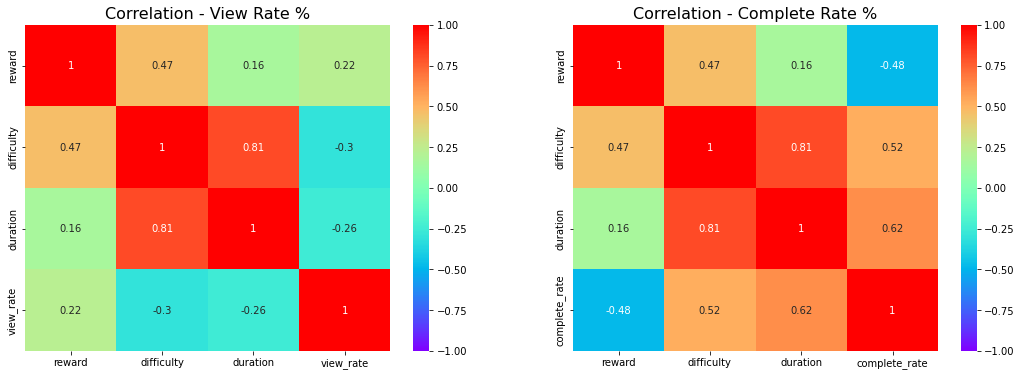

In [66]:
fig, axs = plt.subplots(1,2, figsize = (18, 6))
sns.heatmap(offers_numeric.iloc[:, :-1].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[0])
axs[0].set_title('Correlation - View Rate %', fontsize = 16)

sns.heatmap(offers_numeric.iloc[:, [0,1,2,4]].corr(), cmap = 'rainbow', 
            annot = True, vmin = -1, vmax = 1, ax = axs[1])
axs[1].set_title('Correlation - Complete Rate %', fontsize = 16)
plt.show()

Observations

- View Rate %

    - All of the three numeric factors (rewards, difficulty and duration) had a trivial correlation with the view rate.

- Complete Rate %

    - Counter-intuitively, reward seems to be negatively correlated with offer completion rate. 

    - offer difficulty seems to be possitively correlated with offer completion rate, but this does not mean difficulty positively affected the completion rate.

    - Duration seems to be positively correlated with offer complete rate. This makes sense as cutomers are more likely to complete an offer if they are given more time.


### 4. Customer Segmentation

For interpreting the clusters, key metrics will be calculated for each cluster. These include Average Purchase Value (APV), purchase frequency, (overall) offer complete rate and sensitivity to offers.


4.1 Extracting Customer behavior Features


In [67]:
# Create an empty df with columns needed
customer_behavior = pd.DataFrame(columns = ['person', 'num_received', 'num_viewed', 'num_completed', 'num_transactions', 'money_spent'])

In [68]:
# Remove rows of customers with missing gender and income
id_to_remove = missing_income['id']
transcripts_filtered = transcripts[~transcripts['person'].isin(id_to_remove)].reset_index(drop = True)

# Add data to `person`, ordered in ascending order
customer_behavior['person'] = transcripts_filtered.value_counts('person').sort_index().index.values

In [69]:
# Aggregate df transcripts
transcripts_filtered = transcripts_filtered.sort_values('person')
transcripts_grouped = transcripts_filtered.groupby(['person', 'event']).count()
transcripts_grouped.head()

dict_key  dict_value  \
person                           event                                   
0009655768c64bdeb2e877511632db8f offer completed         3           3   
                                 offer received          5           5   
                                 offer viewed            4           4   
                                 transaction             8           8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed         3           3   

                                                  hours_since_start  \
person                           event                                
0009655768c64bdeb2e877511632db8f offer completed                  3   
                                 offer received                   5   
                                 offer viewed                     4   
                                 transaction                      8   
0011e0d4e6b944f998e987f904e8c1e5 offer completed                  3   

                                                  days_since_start  
person                           event                              
0009655768c64bdeb2e877511632db8f offer completed                 3  
                                 offer received                  5  
                                 offer viewed                    4  
                                 transaction                     8  
0011e0d4e6b944f998e987f904e8c1e5 offer completed                 3

In [70]:
# Set `person` as index for easy slicing
customer_behavior.set_index('person', inplace = True)

# Add data to `num_received`, `num_viewed`, `num_completed` and `num_transactions`
for person_id in customer_behavior.index.values:
    if (person_id, 'offer received') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_received'] = transcripts_grouped.loc[(person_id, 'offer received'), 'dict_key']
    if (person_id, 'offer viewed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_viewed'] = transcripts_grouped.loc[(person_id, 'offer viewed'), 'dict_key']
    if (person_id, 'offer completed') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_completed'] = transcripts_grouped.loc[(person_id, 'offer completed'), 'dict_key']
    if (person_id, 'transaction') in list(transcripts_grouped.index.values):
        customer_behavior.loc[person_id, 'num_transactions'] = transcripts_grouped.loc[(person_id, 'transaction'), 'dict_key']

In [71]:
# Calculate how much money each customer spent during the month of the campaign
money_spent = transcripts_filtered[transcripts_filtered['event'] == 'transaction'].groupby('person').agg({'dict_value': 'sum'})

# Add to `money_spent`
customer_behavior['money_spent'] = money_spent
customer_behavior.head(3)

num_received num_viewed num_completed  \
person                                                                   
0009655768c64bdeb2e877511632db8f            5          4             3   
0011e0d4e6b944f998e987f904e8c1e5            5          5             3   
0020c2b971eb4e9188eac86d93036a77            5          3             3   

                                 num_transactions money_spent  
person                                                         
0009655768c64bdeb2e877511632db8f                8       127.6  
0011e0d4e6b944f998e987f904e8c1e5                5       79.46  
0020c2b971eb4e9188eac86d93036a77                8      196.86

In [72]:
customer_behavior.isna().sum()

num_received           5
num_viewed           150
num_completed       2839
num_transactions     333
money_spent          333
dtype: int64

Note: There are 5 customers that did not receive any offer during the campaign (but they have made purchases to appear in our data).

This results in NAs in the aggregated df and will be replaced with 0s, as these customers received, viewed, completed 0 offers or made 0 transactions.

In [73]:
# Replace NA with 0
customer_behavior.fillna(0, inplace = True)
customer_behavior.isna().sum()

num_received        0
num_viewed          0
num_completed       0
num_transactions    0
money_spent         0
dtype: int64

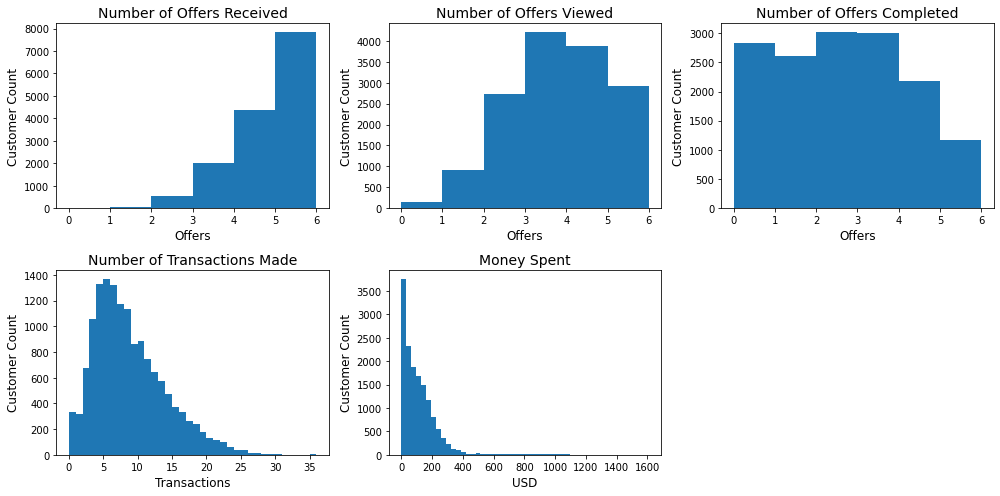

In [74]:
# Check the features with plots
fig, axs = plt.subplots(2,3, figsize = (14, 7))
fig_titles = ['Number of Offers Received', 'Number of Offers Viewed', 'Number of Offers Completed', 'Number of Transactions Made', 'Money Spent']
x_labels = ['Offers', 'Offers','Offers','Transactions','USD']
y_labels = 'Customer Count'

sub_row, sub_col = 0, 0

for i in range(5):
    if i < 3:
        sub_row = 0
        sub_col = i
        bins = customer_behavior.iloc[:, i].max()
        axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
        axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)

    else:
        sub_row = 1
        sub_col = i - 3
        if i == 3:
            bins = customer_behavior.iloc[:, i].max()
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
        else:
            bins = 50
            axs[sub_row, sub_col].hist(customer_behavior.iloc[:, i], bins = bins)
            axs[sub_row, sub_col].set_ylabel(y_labels, fontsize = 12)
    
    axs[sub_row, sub_col].set_title(fig_titles[i], fontsize = 14)
    axs[sub_row, sub_col].set_xlabel(x_labels[i], fontsize = 12)

axs[1,2].set_axis_off()
plt.tight_layout()
plt.show()

Preparing df customer_behavior for clustering

In [75]:
# Keep a copy of the df with `num_received`
customer_behavior_with_num_received = customer_behavior.copy()

# Drop `num_received`
customer_behavior.drop('num_received', axis = 1, inplace = True)
customer_behavior.head(3)

num_viewed  num_completed  num_transactions  \
person                                                                          
0009655768c64bdeb2e877511632db8f           4              3                 8   
0011e0d4e6b944f998e987f904e8c1e5           5              3                 5   
0020c2b971eb4e9188eac86d93036a77           3              3                 8   

                                  money_spent  
person                                         
0009655768c64bdeb2e877511632db8f       127.60  
0011e0d4e6b944f998e987f904e8c1e5        79.46  
0020c2b971eb4e9188eac86d93036a77       196.86

In [76]:

#remove outliers 
#From the plots above, feature money_spent is clearly skewed by outliers, I will look into it.
customer_behavior['money_spent'].describe()

count    14825.000000
mean       117.028155
std        129.965016
min          0.000000
25%         31.450000
50%         87.040000
75%        160.900000
max       1608.690000
Name: money_spent, dtype: float64

In [77]:
# Remove rows with top 2% in `money_spent`
q = customer_behavior['money_spent'].quantile(0.98)
rows_top_money_spent = customer_behavior[customer_behavior['money_spent'] >= q]

person_top_money_spent = rows_top_money_spent.index.values
customer_top_money_spent_removed = customer_behavior[customer_behavior['money_spent'] < q]

print('Number of rows removed:', rows_top_money_spent.shape[0])

Number of rows removed: 297


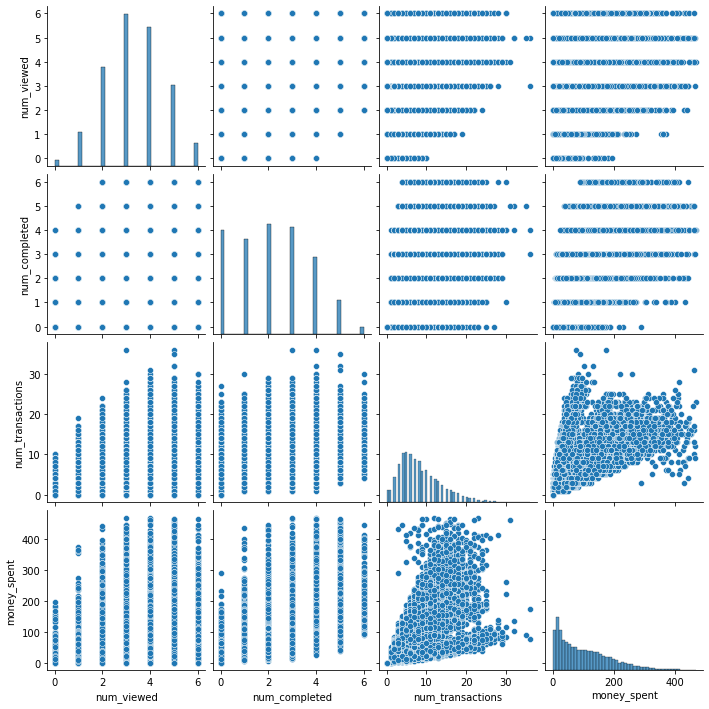

In [78]:
customer_behavior_filtered = customer_top_money_spent_removed.copy()
sns.pairplot(customer_behavior_filtered); plt.show()

4.2 K-Means Clustering
Feature Scaling
The features are of different order of magnitudes, therefore need to be standardized

In [79]:
scaler_customer_behavior = StandardScaler()
scaler_customer_behavior.fit(customer_behavior_filtered)
customer_behavior_scaled = scaler_customer_behavior.transform(customer_behavior_filtered)
pd.DataFrame(data = customer_behavior_scaled, columns = customer_behavior_filtered.columns.values).head(3)

num_viewed  num_completed  num_transactions  money_spent
0    0.501233       0.531352         -0.060069     0.277234
1    1.276977       0.531352         -0.639666    -0.281415
2   -0.274511       0.531352         -0.060069     1.080974

Optimal number of clusters k

In [80]:
df_feature = customer_behavior_scaled
wcss = []
sil_score = []
max_clusters = 10

for k in range(1, max_clusters):
    kmeans = KMeans(n_clusters = k, random_state = 10)
    kmeans.fit(df_feature)
    # calculate wcss for the Elbow Method
    wcss.append(kmeans.inertia_)
    
    # calculate the mean Silhouette coefficient
    if k >= 2:
        labels = kmeans.labels_
        sil_score.append(metrics.silhouette_score(df_feature, labels))


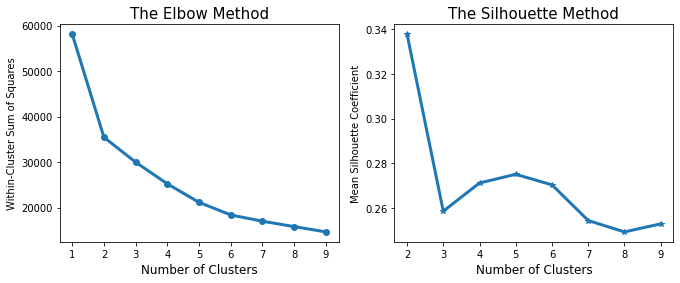

In [81]:
# Plot
fig, axs = plt.subplots(1,2, figsize = (11,4))
axs[0].plot(np.arange(1, max_clusters), wcss, marker = 'o', lw = 3)
axs[0].set_xlabel('Number of Clusters', fontsize = 12)
axs[0].set_ylabel('Within-Cluster Sum of Squares')
axs[0].set_title('The Elbow Method', fontsize = 15)

axs[1].plot(np.arange(2, max_clusters), sil_score, marker = '*' , lw = 3)
axs[1].set_xlabel('Number of Clusters', fontsize = 12)
axs[1].set_ylabel('Mean Silhouette Coefficient')
axs[1].set_title('The Silhouette Method', fontsize = 15)
plt.show()

- From the Elbow graph, it can be observed that from k = 5, the within cluster sum of squares (WCSS) stops decreasing at an increasing rate.
- From the Silhouette graph, the maximum is found at k = 5 (k = 2 excluded).

5 segments may seem quiet a lot, but if the clusters show clear difference in features, the result should still be intepretable.
Therefore, 5 clusters will be used for the K-Means clustering analysis.

K-Means Clustering

cluster
0    4018
1    2901
2    2649
3    1584
4    3376
dtype: int64

 ************************************************************
Silhouette Score: 0.274991463208214

 ************************************************************
        num_viewed num_completed num_transactions money_spent
              mean          mean             mean        mean
cluster                                                      
0              2.1           0.7              5.0        34.6
1              4.5           4.1             12.2       223.0
2              4.5           1.5              4.5        50.3
3              3.5           2.0             17.1        72.2
4              2.8           2.9              7.7       140.2


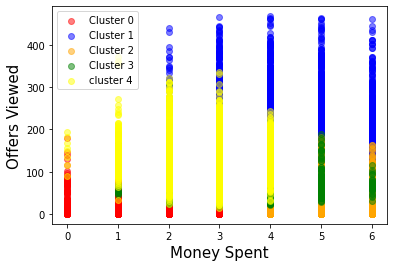

In [82]:
k = 5
df_feature = customer_behavior_scaled
kmeans = KMeans(n_clusters = k, random_state = 10)
kmeans.fit_transform(df_feature)
customer_with_cluster = customer_behavior_filtered.assign(cluster = kmeans.labels_)
print(customer_with_cluster.value_counts('cluster').sort_index())

line_sep = '*' * 60
print('\n', line_sep)
print('Silhouette Score:', metrics.silhouette_score(df_feature, labels = kmeans.labels_))

#
cluster_info = customer_with_cluster.groupby('cluster').agg([np.mean])
print('\n', line_sep)
print(cluster_info.round(1))

# Plot
color_list = ['red', 'blue', 'orange', 'green', 'yellow']
legend_list = ['Cluster 0', 'Cluster 1', 'Cluster 2', 'Cluster 3', 'cluster 4']
for i in range(k):
    plt.scatter(customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'num_viewed'],
               customer_with_cluster.loc[customer_with_cluster['cluster'] == i , 'money_spent'],
               c = color_list[i], label = legend_list[i], alpha = 0.5)
plt.ylabel('Offers Viewed', fontsize = 15)
plt.xlabel('Money Spent', fontsize = 15)
plt.legend(legend_list)
plt.show()

Observations
Although the Silhouette score is quite low (0.275), clusters can be identified when plotted using money_spent and num_viewed.

Classification with Multiclass Logistic Regression

In [83]:
# Split data for train and test
X = customer_behavior_scaled
Y = customer_with_cluster['cluster']
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size = 0.2, random_state = 10)

In [84]:
# Multiclass logistic regression
clf = LogisticRegression()
clf.fit(x_train, y_train)

# Check test accurracy
y_predict = clf.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.993805918788713


gussian mixture model


In [85]:
from sklearn.mixture import GaussianMixture
gmm = GaussianMixture(n_components=5)
gmm.fit(x_train,y_train)

y_predict = gmm.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.25258086717136957


Classification with K-Nearest Neighbors

In [86]:
# K-Nearest Neighbors Classificaiton
knn = KNeighborsClassifier(n_neighbors = 4)
knn.fit(x_train, y_train)

# Check test accuracy
y_predict = knn.predict(x_test)
print("Test accuracy:", metrics.accuracy_score(y_test, y_predict))

Test accuracy: 0.9855471438403304


Interpretation of the high test accuracy:

Both Classification methods achieved a high test accuracy, when using the labels given by K-Means clustering analysis as targets. This indicates that the patterns identified by K-Means Clustering for each cluster do exist and are sufficiently clear to be captured by both classification algorithms for over 98% of the samples.

4.3 Clustering Result Visualization & Interpretation

Visualize clusters separately

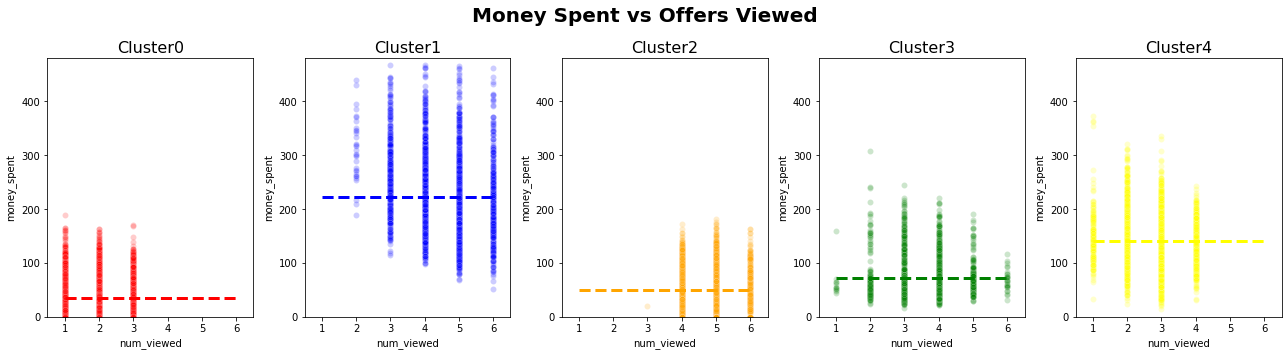

In [87]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'money_spent', alpha = 0.2, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'money_spent': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0,480))
fig.suptitle('Money Spent vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

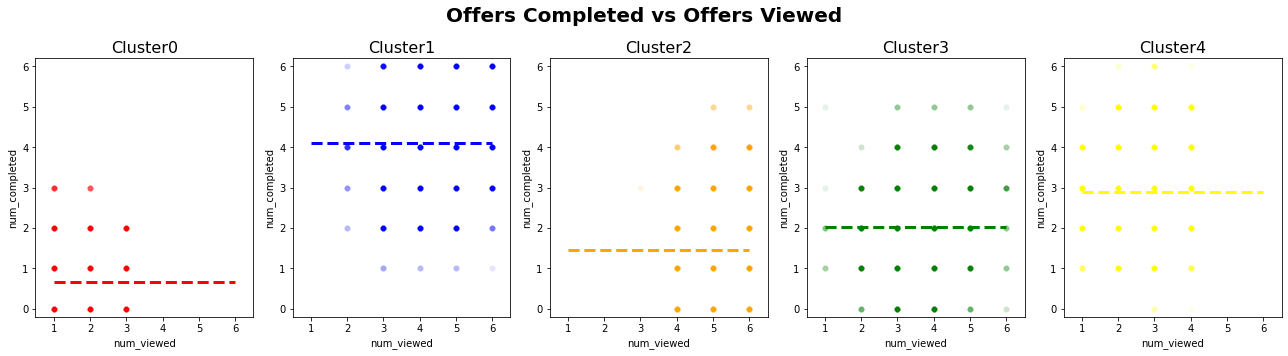

In [88]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_completed', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_completed': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((-0.2,6.2))
fig.suptitle('Offers Completed vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

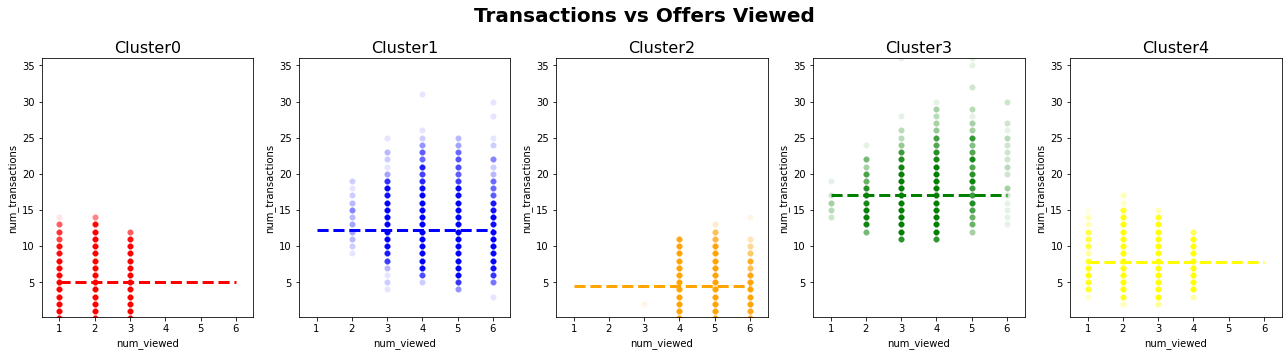

In [89]:
fig, axs = plt.subplots(1, k, figsize = (18,5))
for i in range(k):
    sns.scatterplot(data = customer_with_cluster[customer_with_cluster['cluster'] == i],
                   x = 'num_viewed', y = 'num_transactions', alpha = 0.1, color = color_list[i], ax = axs[i])
    
    mean_value = customer_with_cluster[customer_with_cluster['cluster'] == i].agg({'num_transactions': 'mean'})
    axs[i].plot(np.arange(1, 7), (np.ones((1, 6))*mean_value.values).reshape((6,-1)), 
                color = color_list[i], lw =3, linestyle = 'dashed')
    axs[i].set_title('Cluster' + str(i), fontsize = 16)
    axs[i].set_xlim((0.5,6.5))
    axs[i].set_ylim((0.2,36))
fig.suptitle('Transactions vs Offers Viewed', fontsize = 20, fontweight = 'bold')
plt.tight_layout()
plt.show()

Observations:

Note the dashed lines are the average values of each cluster.
Differences are clear from all three pair-wise features plots. This reflects the clustering is effective even the Silhouette score is low.

In [90]:
cluster0 = customer_with_cluster[customer_with_cluster['cluster'] == 0].index.values
cluster1 = customer_with_cluster[customer_with_cluster['cluster'] == 1].index.values
cluster2 = customer_with_cluster[customer_with_cluster['cluster'] == 2].index.values
cluster3 = customer_with_cluster[customer_with_cluster['cluster'] == 3].index.values
cluster4 = customer_with_cluster[customer_with_cluster['cluster'] == 4].index.values

### storing data with clusters 

In [91]:
s = customer_with_cluster['cluster']

#s.loc['003d66b6608740288d6cc97a6903f4f0'] --> gives cluster number

customer_cluster = customers.copy()
val=[]
for i in customer_cluster['id'] :
    if i in customer_with_cluster.index.values :
        val.append(s.loc[i])
    else :
        val.append("")

val

[0,
 4,
 0,
 2,
 0,
 2,
 0,
 1,
 4,
 0,
 0,
 1,
 4,
 2,
 2,
 2,
 0,
 0,
 3,
 4,
 0,
 2,
 4,
 3,
 1,
 4,
 3,
 4,
 0,
 2,
 1,
 3,
 1,
 3,
 3,
 3,
 2,
 4,
 4,
 1,
 1,
 0,
 0,
 1,
 4,
 4,
 0,
 1,
 4,
 1,
 2,
 0,
 0,
 1,
 1,
 0,
 2,
 4,
 1,
 0,
 0,
 2,
 3,
 3,
 0,
 2,
 1,
 4,
 1,
 3,
 0,
 1,
 0,
 4,
 1,
 2,
 1,
 0,
 0,
 0,
 0,
 1,
 4,
 4,
 1,
 1,
 4,
 0,
 '',
 4,
 1,
 0,
 1,
 1,
 4,
 0,
 2,
 2,
 0,
 2,
 2,
 0,
 2,
 0,
 4,
 2,
 1,
 1,
 1,
 0,
 0,
 4,
 0,
 0,
 2,
 0,
 2,
 1,
 4,
 0,
 2,
 0,
 0,
 '',
 0,
 2,
 0,
 0,
 0,
 0,
 2,
 0,
 4,
 1,
 0,
 2,
 2,
 4,
 3,
 0,
 4,
 1,
 1,
 3,
 2,
 4,
 0,
 0,
 2,
 4,
 0,
 3,
 1,
 1,
 4,
 0,
 2,
 0,
 0,
 4,
 4,
 0,
 0,
 0,
 0,
 4,
 0,
 4,
 1,
 2,
 1,
 '',
 0,
 2,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 4,
 4,
 0,
 4,
 0,
 4,
 4,
 4,
 2,
 4,
 0,
 1,
 1,
 2,
 2,
 1,
 0,
 0,
 0,
 2,
 1,
 1,
 1,
 0,
 '',
 1,
 2,
 2,
 1,
 4,
 1,
 3,
 4,
 1,
 1,
 1,
 0,
 2,
 3,
 1,
 4,
 4,
 1,
 0,
 4,
 0,
 1,
 4,
 0,
 '',
 4,
 4,
 3,
 2,
 1,
 4,
 4,
 2,
 4,
 1,
 '',
 4,
 2,
 0

In [92]:
customer_cluster['cluster'] = val
customer_cluster

gender  age                                id became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
2          M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   
3          M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   
...      ...  ...                               ...              ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
14822      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income age_group income_group cluster  
0      112000.0   46-55ys       > 105k       0  
1      100000.0   66-75ys      90-105k       4  
2       70000.0   66-75ys       60-75k       0  
3       53000.0   56-65ys       45-60k       2  
4       51000.0   56-65ys       45-60k       0  
...         ...       ...          ...     ...  
14820   54000.0   36-45ys       45-60k       0  
14821   72000.0   56-65ys       60-75k       0  
14822   73000.0   46-55ys       60-75k       0  
14823   50000.0   76-85ys       45-60k       4  
14824   82000.0   56-65ys       75-90k       4  

[14825 rows x 8 columns]

### Relative performace of each cluster in each field

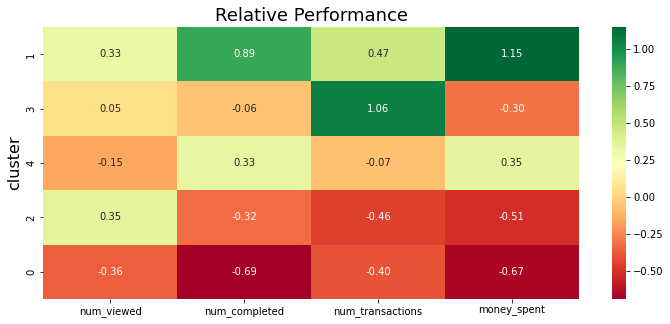

In [93]:
# Calculate the relative performace of cluster's attribute values compared to all customers as a population
cluster_mean = customer_with_cluster.groupby('cluster').mean()
population_mean = customer_with_cluster.mean()
relative_importance = (cluster_mean / population_mean[0 :-1]) - 1

# Sort clusters by overall (summation) performance
importance_ranking = relative_importance.sum(axis = 1).sort_values(ascending = False).index.values
relative_importance = relative_importance.reindex(importance_ranking)

# Plot the heatmap
plt.figure(figsize = (12, k))
plt.title('Relative Performance', fontsize = 18)
plt.xlabel('Feature', fontsize = 16)
plt.ylabel('Cluster', fontsize = 16)
sns.heatmap(data = relative_importance, annot = True, fmt = '.2f', cmap = 'RdYlGn')
plt.show()

Key Metrics of each cluster are given as follows :
- Frequency - Number of transactions made during the month of campaign
- Average Purchase Value - Average number of dollars spent on each transaction
- Offer Complete Rate - Offer overall completion rate
- Sensitivity to Offer - Proportion of transactions made with offers (calculated as num_completed divided by num_transactions)

In [94]:
# Calculated the mean of all features for each cluster
temp = pd.merge(customer_with_cluster, customer_behavior_with_num_received['num_received'], left_index = True, right_index = True)
cluster_means = temp.groupby('cluster').mean().round(3)
cluster_means = cluster_means.reindex(importance_ranking)
cluster_means

num_viewed  num_completed  num_transactions  money_spent  \
cluster                                                             
1             4.452          4.096            12.223      222.970   
3             3.512          2.028            17.098       72.242   
4             2.845          2.887             7.744      140.156   
2             4.541          1.463             4.529       50.347   
0             2.143          0.671             4.992       34.568   

         num_received  
cluster                
1               5.094  
3               4.674  
4               4.150  
2               5.029  
0               3.881

In [95]:
# Create the df for summarizing by clusters
cluster_summary = pd.DataFrame(columns = ['cluster', 'frequency', 'avg_purchase_value', 'offer_complete_rate', 'offer_sensitivity'])
cluster_summary['cluster'] = index = np.arange(k)
cluster_summary.set_index('cluster', drop = True, inplace = True)

In [96]:
# Add values to df `cluster_summary`
cluster_summary['frequency'] = cluster_means['num_transactions'].round(1)
cluster_summary['avg_purchase_value'] = (cluster_means['money_spent'] / cluster_means['num_transactions']).round(1)
cluster_summary['offer_complete_rate'] = (cluster_means['num_completed'] / cluster_means['num_received']).round(2)
cluster_summary['offer_sensitivity'] = (cluster_means['num_completed'] / cluster_means['num_transactions']).round(2)

In [97]:
# Redorder index
cluster_summary = cluster_summary.reindex(importance_ranking)
cluster_summary

frequency  avg_purchase_value  offer_complete_rate  offer_sensitivity
cluster                                                                       
1             12.2                18.2                 0.80               0.34
3             17.1                 4.2                 0.43               0.12
4              7.7                18.1                 0.70               0.37
2              4.5                11.1                 0.29               0.32
0              5.0                 6.9                 0.17               0.13

Interpretation of the clustering result

- Most Valuebale Customers (MVC) - Cluster 1

    - These customers viewed and completed a high number of offers. This means they are highly responsive to offers.
    - They did not make the most purchases (~12, about one purchase every 3 days) but spent the most money among all clusters, more than twice of the overall average during the month of campaign.
    - They have the highest Average Purchase Value of 18.2 USD.
    ###
    - Recommendation: The company should try their best to keep these customers, and try to attract them to make more purchases for their high average purchase value.

- Regulars - Cluster 3

    - These customers made the most number of purchases during the month of campaign, more than one purchase every two days - they are the company's regular customers.
    - The number of offers they viewed and completed are around overall average. They are not very sensitive to offers. They are willing to buy with or without offers.
    - Suprisingly, their total spending over the month of campaign is slightly lower than the overall average, due to a low Average Purchase Value of only 4.2 USD.
    ###
    - Customization: These customers are the company's regulars. They'd purchase with or without offers. They company should keep these customers and try to increase their Average Purchase Value. Maybe by letting them try high-price products for free or at a discount price to inspire them to spend more.

- High-Potentials - Cluster 4

    - These customers had the second highest Average Purchase Value of 18.1 USD (first is 18.2 USD).
    - They viewed most offers they received and completed 70% of them.
    - They have relatively high sensitivity to offers.
    ###
    - Customization: These customers have high potential to become Most Valuable Customers if their purchase frequency increases. As their sensitivity and response to offer is relatively high, the company should send them more offers to make them make more purchases, which will in turn enhancing their customer stickiness.

- Offer-Viewers - Cluster 2

    - These customers viewed the most offers (4.5).
    - However, they comepleted very few of them (1.5).
    - They have a moderate Average Purchase Value of 11.1 USD.
    ###
    - Customization: These customers love to click offers! Send them more offers with really good deals for a variaty of products to attract them to try. This may help them form the habbit of purchasing.

- Low-Engagers - Cluster 0

    - These customers showed extemely low engagement through all features, despite the fact they received a similar number of offers to customers in other clusters.
    - They have a low Average Purchase Value of 6.9 USD.
    ###
    - Customization: Currently they did not engage much, either becuase they are loyal customers of other brands or they do not have the habbit of purchasing hot beverages outside. The company need to invest more resourse if they wish to change the current situation.

### examining clusters

Text(0.5, 1.0, 'Clustering (k=5)')

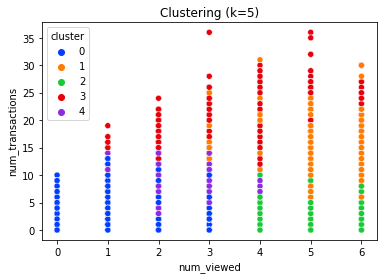

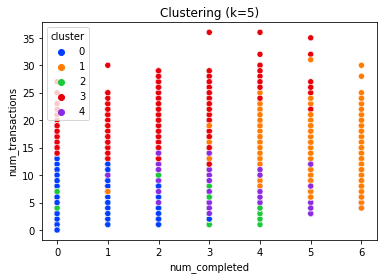

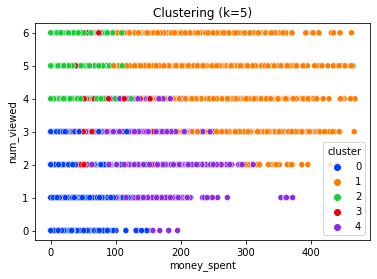

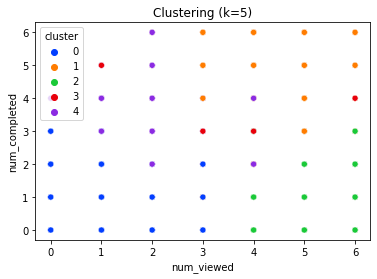

In [98]:
fig, ax = plt.subplots()
sns.scatterplot(x="num_viewed", y="num_transactions", data=customer_with_cluster, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')

fig, ax = plt.subplots()
sns.scatterplot(x="num_completed", y="num_transactions", data=customer_with_cluster, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')

fig, ax = plt.subplots()
sns.scatterplot(x="money_spent", y="num_viewed", data=customer_with_cluster, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')

fig, ax = plt.subplots()
sns.scatterplot(x="num_viewed", y="num_completed", data=customer_with_cluster, 
                palette=sns.color_palette("bright",k),
                hue='cluster', size_order=[1,0],
                legend="brief", ax=ax).set_title('Clustering (k='+str(k)+')')


### storing the data 

In [99]:
customer_cluster

gender  age                                id became_member_on  \
0          F   55  0610b486422d4921ae7d2bf64640c50b       2017-07-15   
1          F   75  78afa995795e4d85b5d9ceeca43f5fef       2017-05-09   
2          M   68  e2127556f4f64592b11af22de27a7932       2018-04-26   
3          M   65  389bc3fa690240e798340f5a15918d5c       2018-02-09   
4          M   58  2eeac8d8feae4a8cad5a6af0499a211d       2017-11-11   
...      ...  ...                               ...              ...   
14820      F   45  6d5f3a774f3d4714ab0c092238f3a1d7       2018-06-04   
14821      M   61  2cb4f97358b841b9a9773a7aa05a9d77       2018-07-13   
14822      M   49  01d26f638c274aa0b965d24cefe3183f       2017-01-26   
14823      F   83  9dc1421481194dcd9400aec7c9ae6366       2016-03-07   
14824      F   62  e4052622e5ba45a8b96b59aba68cf068       2017-07-22   

         income age_group income_group cluster  
0      112000.0   46-55ys       > 105k       0  
1      100000.0   66-75ys      90-105k       4  
2       70000.0   66-75ys       60-75k       0  
3       53000.0   56-65ys       45-60k       2  
4       51000.0   56-65ys       45-60k       0  
...         ...       ...          ...     ...  
14820   54000.0   36-45ys       45-60k       0  
14821   72000.0   56-65ys       60-75k       0  
14822   73000.0   46-55ys       60-75k       0  
14823   50000.0   76-85ys       45-60k       4  
14824   82000.0   56-65ys       75-90k       4  

[14825 rows x 8 columns]

In [100]:
customer_cluster.to_csv('customer_segments.csv')